In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [30]:
df = pd.read_csv(r"C:\Users\suert\Downloads\gene_expression.csv")
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [31]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [32]:
df.describe()


,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


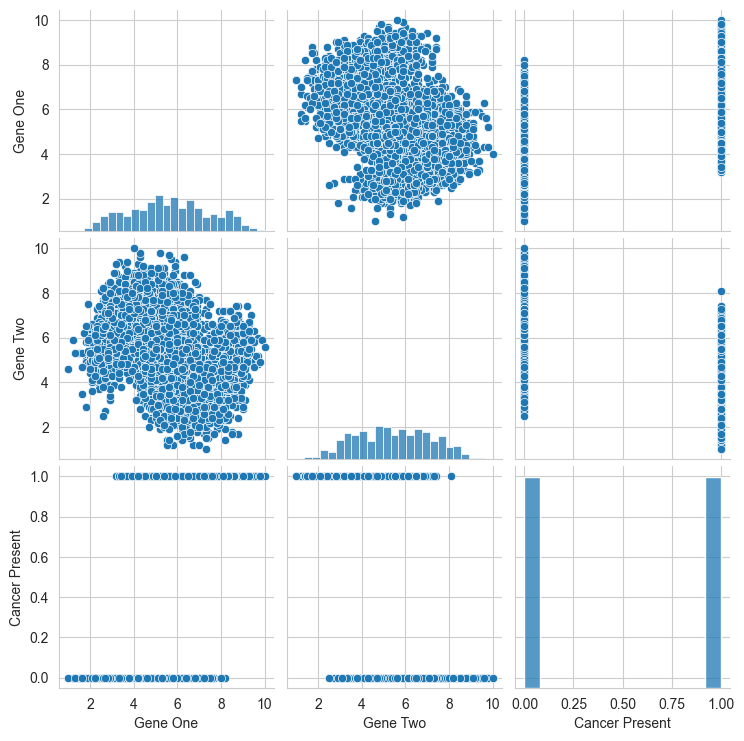

In [34]:
sns.pairplot(df)

<Axes: xlabel='Gene One', ylabel='Gene Two'>

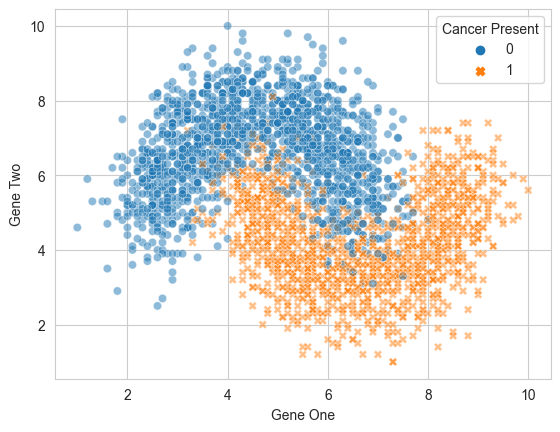

In [35]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.5, style='Cancer Present')


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
X=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)

In [42]:
X_test = scaler.fit_transform(X_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
y_pred = knn.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [53]:
confusion_matrix(y_test, y_pred)    

array([[426,  44],
       [ 34, 396]], dtype=int64)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       470
           1       0.90      0.92      0.91       430

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



In [56]:
accuracy_score(y_test, y_pred)

0.9133333333333333

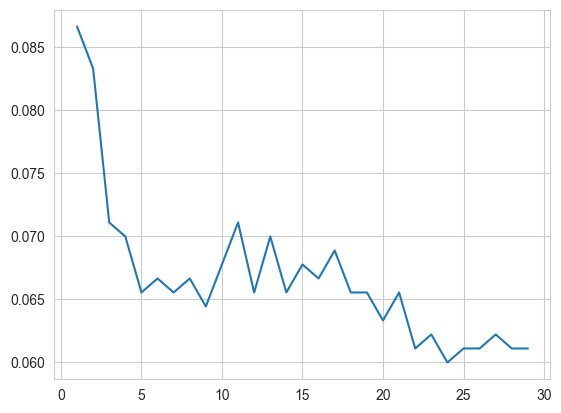

In [58]:
test_errror_rate=[]
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    test_error_=1-accuracy_score(y_test, pred_y)
    test_errror_rate.append(test_error_)

plt.plot(range(1,30),test_errror_rate)

In [59]:
scaler = StandardScaler()


In [ ]:
knn = KNeighborsClassifier()

In [60]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [61]:
operations=[('scaler',scaler),('knn',knn)]

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
pipe=Pipeline(operations)

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
k_values= list(range(1,20))

In [66]:
param_grid = dict(knn__n_neighbors=k_values)

In [67]:
full_cv_classsifier=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [68]:
full_cv_classsifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=29))]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [69]:
full_cv_classsifier.best_params_

{'knn__n_neighbors': 16}

In [71]:
full_pred=full_cv_classsifier.predict(X_test)

In [72]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       470
           1       0.93      0.93      0.93       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900

